In [4]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('pistachio.csv')

In [7]:
def test_train_split(data,train_ratio):
    
    ''' 
    Splits the dataset with respect to the test train ratio
    data: dataset to split
    train_ratio: the ratio of train part to the whole dataset 
    returns test set, train set
    '''

    lenght_of_dataset = len(data)
    amount_of_data = int((train_ratio/100)*lenght_of_dataset)

    train_set = []
    test_set = []

    random_index_list = []

    for index in range(amount_of_data):
        while len(random_index_list) <= amount_of_data:
            random_index = random.randrange(lenght_of_dataset)
            if random_index not in random_index_list:
                random_index_list.append(random_index)
            else:
                pass

    for index in range(lenght_of_dataset):
        if index not in random_index_list:
            test_set.append(data.iloc[index])
        else:
            train_set.append(data.iloc[index])

    return pd.DataFrame(test_set), pd.DataFrame(train_set)

In [8]:
test,train = test_train_split(data,80)

In [9]:
test[test.columns[-1]].unique()

array(['Kirmizi_Pistachio', 'Siit_Pistachio'], dtype=object)

In [10]:
def select_future(data = pd.DataFrame): 
    
    ''' 
    This function takes the best feature to choose for optimal gain
    returns the classes and their relevence, the higher is better
    '''

    # its assumed that one column is for results and its the last column
    number_of_features = len(data.columns) - 2

    purity = {}
    

    for index in range(number_of_features):

        Kirmizi_Pistachio = 0
        Siit_Pistachio = 0
        
        Kirmizi_Pistachio_values = 0
        Siit_Pistachio_values = 0

        std_dev = np.std(data[data.columns[index]])

        for inner_index in range(len(data[data.columns[index]])):
            
            # i know that there is 2 possible pistachios in the dataset, so i hard-coded them.
            std_dev = np.std(data[data.columns[inner_index]])
            if data.iloc[inner_index][-1] == 'Kirmizi_Pistachio':
                Kirmizi_Pistachio_values += data.iloc[inner_index][0]
                Kirmizi_Pistachio += 1
            elif data.iloc[inner_index][-1] == 'Siit_Pistachio':
                Siit_Pistachio_values += data.iloc[inner_index][0]
                Siit_Pistachio += 1

        mean_siit = Siit_Pistachio_values/len(data[data.columns[index]])
        mean_kirmizi = Kirmizi_Pistachio_values/len(data[data.columns[index]])

        purity.update({data.columns[index] : abs(Kirmizi_Pistachio/Siit_Pistachio)})


        
    print(std_dev)

        
    return purity

In [11]:
relevence = select_future(train)

TypeError: could not convert string to float: 'Kirmizi_Pistachio'

In [12]:
relevence

NameError: name 'relevence' is not defined

In [13]:
min(relevence)

NameError: name 'relevence' is not defined

In [14]:
train[train.columns[16]]

0       Kirmizi_Pistachio
1          Siit_Pistachio
2       Kirmizi_Pistachio
3       Kirmizi_Pistachio
4       Kirmizi_Pistachio
              ...        
1710       Siit_Pistachio
1712       Siit_Pistachio
1714    Kirmizi_Pistachio
1715       Siit_Pistachio
1716    Kirmizi_Pistachio
Name: Class, Length: 1375, dtype: object

In [42]:
x = train[train.columns[15]]
y = train[train.columns[-1]]

In [43]:
np.std(x)

0.050848436521746816

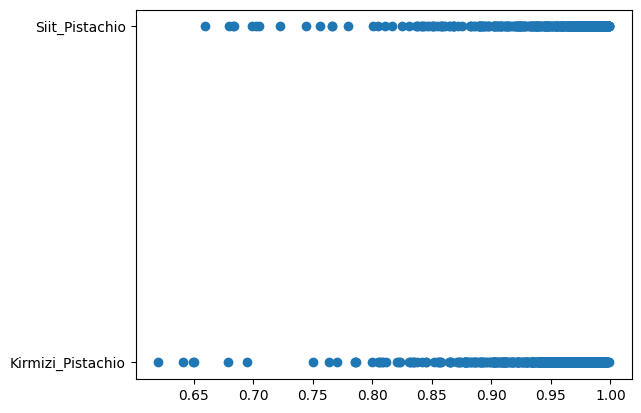

In [44]:
fig, ax = plt.subplots()

ax.scatter(x, y)


plt.show()

In [25]:
data.iloc[0]

AREA                         73107
PERIMETER                 1161.807
MAJOR_AXIS                442.4074
MINOR_AXIS                217.7261
ECCENTRICITY                0.8705
EQDIASQ                   305.0946
SOLIDITY                    0.9424
CONVEX_AREA                  77579
EXTENT                       0.771
ASPECT_RATIO                2.0319
ROUNDNESS                   0.6806
COMPACTNESS                 0.6896
SHAPEFACTOR_1               0.0061
SHAPEFACTOR_2                0.003
SHAPEFACTOR_3               0.4756
SHAPEFACTOR_4               0.9664
Class            Kirmizi_Pistachio
Name: 0, dtype: object

In [47]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

def test_train_split(data,train_ratio):
    
    ''' 
    Splits the dataset with respect to the test train ratio
    data: dataset to split
    train_ratio: the ratio of train part to the whole dataset 
    returns test set, train set
    '''

    lenght_of_dataset = len(data)
    amount_of_data = int((train_ratio/100)*lenght_of_dataset)

    train_set = []
    test_set = []

    random_index_list = []

    for index in range(amount_of_data):
        while len(random_index_list) <= amount_of_data:
            random_index = random.randrange(lenght_of_dataset)
            if random_index not in random_index_list:
                random_index_list.append(random_index)
            else:
                pass

    for index in range(lenght_of_dataset):
        if index not in random_index_list:
            test_set.append(data.iloc[index])
        else:
            train_set.append(data.iloc[index])

    return pd.DataFrame(test_set), pd.DataFrame(train_set)

def select_future(data = pd.DataFrame): 
    
    ''' 
    This function takes the best feature to choose for optimal gain
    returns the classes and their relevence, the higher is better
    '''

    # its assumed that one column is for results and its the last column
    number_of_features = len(data.columns) - 1

    purity = {}
    

    for index in range(number_of_features):

        
        Kirmizi_Pistachio = 0
        Siit_Pistachio = 0
        
        Kirmizi_Pistachio_values = 0
        Siit_Pistachio_values = 0

        std_dev = np.std(data[data.columns[index]])
        mean = np.mean(data[data.columns[index]])

        for inner_index in range(len(data[data.columns[index]])):
            
            # i know that there is 2 possible pistachios in the dataset, so i hard-coded them.
            if data.iloc[inner_index][-1] == 'Kirmizi_Pistachio':
                Kirmizi_Pistachio_values += data.iloc[inner_index][0]
                Kirmizi_Pistachio += 1
            elif data.iloc[inner_index][-1] == 'Siit_Pistachio':
                Siit_Pistachio_values += data.iloc[inner_index][0]
                Siit_Pistachio += 1

        mean_siit = Siit_Pistachio_values/len(data[data.columns[index]])
        mean_kirmizi = Kirmizi_Pistachio_values/len(data[data.columns[index]])

        diff_ratio = str(abs(mean_kirmizi/mean_siit))

        if std_dev > float(diff_ratio):
            print(f'First breakpoint {mean - float(std_dev)*float(diff_ratio)}')
            print(f'Second breakpoint {mean + float(std_dev)*float(diff_ratio)}')
            purity.update({data.columns[index] : (abs(Kirmizi_Pistachio/Siit_Pistachio),'HP')})
            # HP -> high priority
            

        else:
            print(f'breakpoint {mean}')
            purity.update({data.columns[index] : (abs(Kirmizi_Pistachio/Siit_Pistachio),'LP')})
            #LP -> low priority

    return purity


def main():

    data = pd.read_csv('pistachio.csv')
    test,train = test_train_split(data,80)
    relevence = select_future(train)
    print(relevence)

if __name__=="__main__":
    main()

First breakpoint 64812.80843467276
Second breakpoint 94708.99229259996
First breakpoint 988.4696245306855
Second breakpoint 1856.2550753965875
First breakpoint 408.5739964081537
Second breakpoint 483.2091036645736
First breakpoint 202.99709899006712
Second breakpoint 273.3910358462965
breakpoint 0.8400675636363636
First breakpoint 286.87519656883603
Second breakpoint 348.25883004934576
breakpoint 0.939609890909091
First breakpoint 69721.22690346843
Second breakpoint 100057.20655107702
breakpoint 0.7162411636363636
breakpoint 1.8977722181818177
breakpoint 0.5703709090909092
breakpoint 0.7128584
breakpoint 0.005707127272727273
breakpoint 0.0030218181818181815
breakpoint 0.5100820363636364
breakpoint 0.9546537454545455
{'AREA': (1.399650959860384, 'HP'), 'PERIMETER': (1.399650959860384, 'HP'), 'MAJOR_AXIS': (1.399650959860384, 'HP'), 'MINOR_AXIS': (1.399650959860384, 'HP'), 'ECCENTRICITY': (1.399650959860384, 'LP'), 'EQDIASQ': (1.399650959860384, 'HP'), 'SOLIDITY': (1.399650959860384, 'LP